The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above.

The Strategy division of Ripple Renewable Energy (RRE). RRE operates in the following U.S. states: California, Florida, Michigan, Ohio, Pennsylvania, Texas. Constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:

* Provide a summary of the mean AQI for the states in which RRE operates.
* Construct a boxplot visualization for AQI of these states using seaborn.
* Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
* Construct a confidence interval for the RRE state with the highest mean AQI.

In [11]:
# Import relevant packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
# Load dataset

aqi_raw = pd.read_csv('./Raw_data/c4_epa_air_quality.csv')
aqi_raw.head(15)

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3
5,5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.994737,14
6,6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,0.200000,2
7,7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,0.200000,2
8,8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,0.400000,5
9,9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,0.300000,6


In [4]:
# Data Exploration

aqi_raw.describe()

,Unnamed: 0,arithmetic_mean,aqi
count,260.000000,260.000000,260.000000
mean,129.500000,0.403169,6.757692
std,75.199734,0.317902,7.061707
min,0.000000,0.000000,0.000000
25%,64.750000,0.200000,2.000000
50%,129.500000,0.276315,5.000000
75%,194.250000,0.516009,9.000000
max,259.000000,1.921053,50.000000


In [6]:
aqi_raw["date_local"].describe()

count            260
unique             1
top       2018-01-01
freq             260
Name: date_local, dtype: object

In [7]:
aqi_raw["date_local"] = pd.to_datetime(aqi_raw["date_local"])
aqi_raw["date_local"].describe()

count                    260
mean     2018-01-01 00:00:00
min      2018-01-01 00:00:00
25%      2018-01-01 00:00:00
50%      2018-01-01 00:00:00
75%      2018-01-01 00:00:00
max      2018-01-01 00:00:00
Name: date_local, dtype: object

In [8]:
aqi_raw.groupby("state_name")["city_name"].count()

state_name
Alabama                  1
Alaska                   2
Arizona                 14
Arkansas                 1
California              66
Colorado                 9
Connecticut              4
Delaware                 1
District Of Columbia     2
Florida                 12
Georgia                  2
Hawaii                   3
Idaho                    2
Illinois                 3
Indiana                  5
Iowa                     3
Kansas                   1
Kentucky                 3
Louisiana                1
Maine                    2
Maryland                 4
Massachusetts            4
Michigan                 9
Minnesota                7
Mississippi              1
Missouri                 3
Montana                  2
Nebraska                 2
Nevada                   4
New Hampshire            2
New Jersey               6
New Mexico               2
New York                10
North Carolina           4
North Dakota             1
Ohio                    12
Oklahoma         

In [9]:
# Statiscal Test 

# Summarize the mean AQI for RRE states.

# Create a list of RRE states.
RRE_states = ["California", "Florida", "Michigan", "Ohio", "Pennsylvania", "Texas"]

# Subset `aqi` to only consider these states.
aqi_RRE_states = aqi_raw[ aqi_raw["state_name"].isin(RRE_states)]
aqi_RRE_states.head()
# Find the mean aqi for each of the RRE states.
aqi_RRE_mean = round(aqi_RRE_states["aqi"].mean(),4)
aqi_RRE_mean

np.float64(8.6975)

<Axes: xlabel='state_name', ylabel='aqi'>

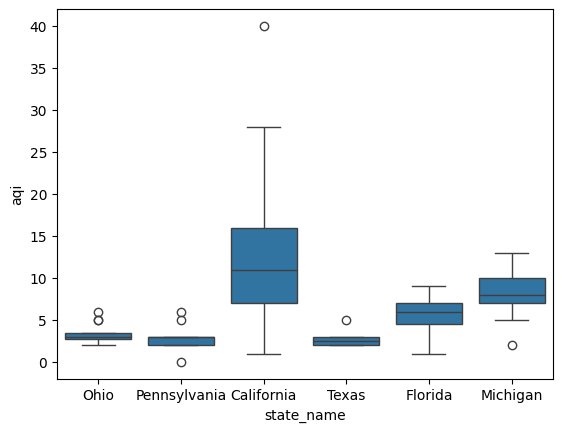

In [12]:
sns.boxplot(
    data= aqi_RRE_states,
    x = "state_name",
    y = "aqi"
)


# Construct a confidence interval for the RRE state with the highest mean AQI

In [13]:
# Find the mean aqi for your state.

california_aqi_mean = aqi_raw[ aqi_raw["state_name"] == "California"]["aqi"].mean()
california_aqi_mean

np.float64(12.121212121212121)

In [14]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.
cl = 0.95
z_score = 1.96

# Next, calculate your standard error.
std_error = aqi_raw[ aqi_raw["state_name"] == "California"]["aqi"].std() / (aqi_raw[ aqi_raw["state_name"] == "California"].shape[0]**0.5)
print(std_error)

# Lastly, use the preceding result to calculate your margin of error.
margin_of_error = z_score * std_error
margin_of_error

0.8987209641127412


np.float64(1.7614930896609726)

In [15]:
# Calculate your confidence interval (upper and lower limits).

upper_limit = california_aqi_mean + margin_of_error
lower_limit = california_aqi_mean - margin_of_error

print(f"The 95% confidence level: [{lower_limit:.2f},{upper_limit:.2f}]")

The 95% confidence level: [10.36,13.88]


# Alternative: Construct the interval using scipy.stats.norm.interval()

In [18]:
lower_limit , upper_limit = stats.norm.interval(confidence=0.95,loc=california_aqi_mean,scale=std_error)
print(f"The 95% confidence level: [{lower_limit:.2f},{upper_limit:.2f}]")

The 95% confidence level: [10.36,13.88]
